# Практикум №2
#### Лабораторна робота № 1

Поліноміальна регресія, алгоритм градієнтного спуску за міні-батчами. MSE з регуляризацією за нормою $L_2$. Дослідити різні значення параметра регуляризації і підібрати найкраще з них.

#### Importing libraries

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.datasets
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

%matplotlib inline

In [ ]:
## Given problem #1

The problem is to build polynomial regression: $y = \beta_0 + \overset{n}{\underset{i = 1}{\sum}}\beta_i \cdot x^i$ by the given dataset.

In [8]:
X_data = np.linspace(-1, 1, 100)

num_coef = 5
coef = [10, 2, 30, 4, 5]
y_data = 0
for i in range(num_coef):
    y_data += coef[i] * np.power(X_data, i)
y_data += np.random.randn(*X_data.shape) * 1.5

In [9]:
def generate_samples(samples_quantity, seed=1):
    
    np.random.seed(seed)
    X_data = np.linspace(-1, 1, samples_quantity)

    num_coef = 5
    coef = [10, 2, 30, 4, 5]
    y_data = 0
    for i in range(num_coef):
        y_data += coef[i] * np.power(X_data, i)
    y_data += np.random.randn(*X_data.shape) * 1.5
    
    return (X_data, y_data)

### Describing dataset

In [10]:
x_shape = X_data.shape
y_shape = y_data.shape
print("X data shape: ", x_shape)
print("Y data shape: ", y_shape)

X data shape:  (100,)
Y data shape:  (100,)


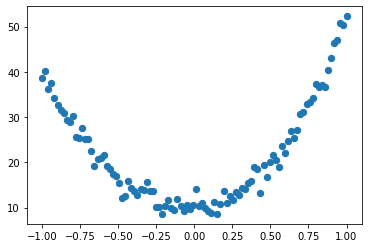

In [11]:
plt.scatter(X_data, y_data, s=40, cmap=plt.cm.Spectral)

We can see that our dataset is 2-dimensional and the silhouette of curve that appeared on the plot is similar to polynome of the 2nd order. So we will make predict of $$y = \beta_0 + \beta_1 x + \beta_2 x^2$$

In [12]:
def polynomial_2_model(params, x):
    b0 = params["b0"]
    b1 = params["b1"]
    b2 = params["b2"]
        
    polynomial_value = b0 + b1 * x + b2 * x * x
    return polynomial_value

In [13]:
# Checking the result
params = {"b0": 3.0, "b1": 2.0, "b2": 1.0}
polynomial_2_model(params, 5.0)

38.0

In [14]:
def create_initial_params():
    return {"b0": 5.0, "b1": 3.0, "b2": 30}

In [15]:
def draw_polynomial_2(params, X_data):
    first_approximation = polynomial_2_model(params, X_data)
    plt.figure(figsize=(20,10))
    plt.scatter(X_data, y_data, s=40, cmap=plt.cm.Spectral)
    plt.scatter(X_data, first_approximation, s=40, cmap=plt.cm.Spectral)

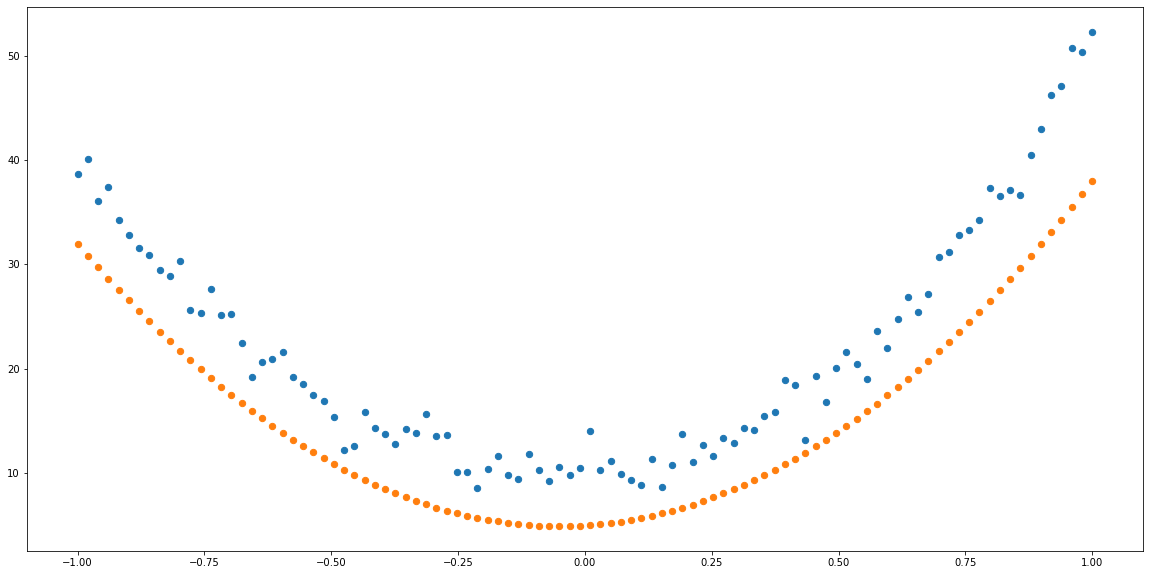

In [16]:
draw_polynomial_2(create_initial_params(), X_data)

The first approximation is bad, lets measuree how:

In [17]:
def mse_loss(y_pred, y_true):
    return 1 / y_pred.shape[0] * np.sum(np.power(y_pred - y_true, 2))

In [18]:
def mse_loss_L2_regularization(y_pred, y_true, params, lambd):
    b0 = params["b0"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    m = y_pred.shape[0]
    
    mse_loss_result = mse_loss(y_pred, y_true)
    regularization_score_L2 = (lambd/2/m) * (b0 * b0 + b1 * b1 + b2 * b2)
    loss_with_regularization = mse_loss_result + regularization_score_L2
    
    return loss_with_regularization

In [95]:
def random_mini_batches(X, Y, mini_batch_size=16, seed=0, permutation=False):
    np.random.seed(seed)
    n = X.shape[1]
    m = X.shape[0]
    mini_batches = []
    
    
    if permutation:
        permutation = list(np.random.permutation(m))
        shuffled_X = X[permutation]
        # shuffled_Y = Y[:, permutation].reshape((1, m))
        shuffled_Y = Y[permutation]
    else:
        shuffled_X = X
        shuffled_Y = Y
    
    num_complete_minibatches = math.floor(m / mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : (k+1) * mini_batch_size]
#         mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : (k+1) * mini_batch_size]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        remain_quantity = mini_batch_size * int(m / mini_batch_size)
        mini_batch_X = shuffled_X[remain_quantity: ]
        mini_batch_Y = shuffled_Y[remain_quantity: ]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [135]:
# Testing minibatch split method 
X_test = np.arange(50)
X_test = np.vstack([[X_test, X_test]]).T
Y_test = np.arange(50).reshape(50, 1)

print(f"Test shapes are X: {X_test.shape} Y: {Y_test.shape}")
minibatches = random_mini_batches(X_test, Y_test, permutation=True)
(test_mini_X, test_mini_Y) = minibatches[0]
print(f"Test minibatch shapes are X: {test_mini_X.shape} Y: {test_mini_Y.shape}")
print(f"\nminibatch X: \n{test_mini_X.T} \nY: \n{test_mini_Y.T}")

Test shapes are X: (50, 2) Y: (50, 1)
Test minibatch shapes are X: (16, 2) Y: (16, 1)

minibatch X: 
[[28 11 10 41  2 27 38 31 22  4 33 35 26 34 18  7]
 [28 11 10 41  2 27 38 31 22  4 33 35 26 34 18  7]] 
Y: 
[[28 11 10 41  2 27 38 31 22  4 33 35 26 34 18  7]]


In [20]:
def gradient_descent_polynomial_2(X, Y, params):
    b0 = params["b0"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    m = X.shape[0]
    db0 = (-2.0/m) * np.sum(Y - polynomial_2_model(params, X))
    db1 = (-2.0/m) * np.sum((Y - polynomial_2_model(params, X)) * X)
    db2 = (-2.0/m) * np.sum((Y - polynomial_2_model(params, X)) * X * X)
    
    grad = {
        "db0": db0,
        "db1": db1,
        "db2": db2
    }
    return grad

In [21]:
def gradient_descent_polynomial_2_with_regularization_L2(X, Y, params, lambd):
    grads = gradient_descent_polynomial_2(X, Y, params)
    
    db0 = grads["db0"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    b0 = params["b0"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    m = X.shape[0]
    
    db0 += ((lambd/m) * b0)
    db1 += ((lambd/m) * b1)
    db2 += ((lambd/m) * b2)
    
    grads = {
        "db0": db0,
        "db1": db1,
        "db2": db2
    }
    
    return grads

In [22]:
def update_params_polynomial_2(grad, params, a):
    b0 = params["b0"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    db0 = grad["db0"]
    db1 = grad["db1"]
    db2 = grad["db2"]
    
    b0 = b0 - (a * db0)
    b1 = b1 - (a * db1)
    b2 = b2 - (a * db2)
    
    params = {
        "b0": b0,
        "b1": b1,
        "b2": b2
    }
    return params

In [23]:
def model_polynomial_2(X, Y, num_iterations=100, \
                       print_costs=False, \
                       activateRegularization=False, regularization_param=0.1):
    seed = 1
    
    m = X.shape[0]
    n_y = Y.shape[0]
    costs = []
    grads = {}
    
    params = create_initial_params()
    
    for i in range(num_iterations):
        seed += 1

        # X = X[:, np.newaxis]
        X = X.reshape(X.shape[0], 1)

        mini_batches = random_mini_batches(X, Y.reshape(m,1), seed=seed)
        cost_total = 0
        
        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_y) = mini_batch
            forward_result = polynomial_2_model(params, mini_batch_X)
            
            if activateRegularization:
                cost_total += mse_loss_L2_regularization(forward_result, mini_batch_y, params, regularization_param)
            else:
                cost_total += mse_loss(forward_result, mini_batch_y)
                
            if activateRegularization:
                grads = gradient_descent_polynomial_2_with_regularization_L2(mini_batch_X, mini_batch_y, params, regularization_param)
            else:
                grads = gradient_descent_polynomial_2(mini_batch_X, mini_batch_y, params)
            
            params = update_params_polynomial_2(grads, params, 0.01)
        
        cost_avg = cost_total / m
        costs.append(cost_avg)
        if print_costs and i % 10 == 0:
            print("Cost average on iteration ", i, " is ", cost_avg)
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
#     plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return params

Cost average on iteration  0  is  2.511708346834131
Cost average on iteration  10  is  0.222569657398686
Cost average on iteration  20  is  0.19816432715720927
Cost average on iteration  30  is  0.19016843154199115
Cost average on iteration  40  is  0.18584079567415576
Cost average on iteration  50  is  0.18321504414909662
Cost average on iteration  60  is  0.18159137104136783
Cost average on iteration  70  is  0.1805926467503057
Cost average on iteration  80  is  0.17998521326704492
Cost average on iteration  90  is  0.17962116436614067


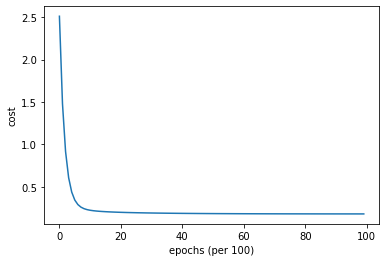

Loss point for train:  2.609299252517077
Loss point for test:  3.0242857079856567


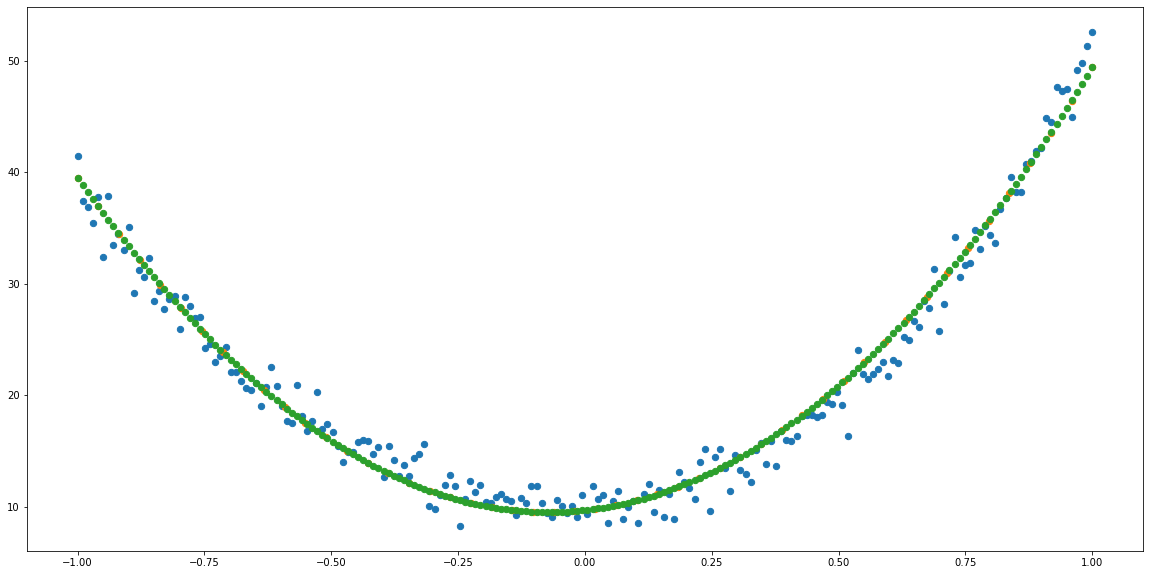

In [24]:
X_data_train, y_data_train = generate_samples(200)
X_data_test, y_data_test = generate_samples(50, seed=2)

params = model_polynomial_2(X_data_train, y_data_train, num_iterations=100, print_costs=True)

a_train = polynomial_2_model(params, X_data_train)
a_test = polynomial_2_model(params, X_data_test)

print("Loss point for train: ", mse_loss(a_train, y_data_train))
print("Loss point for test: ", mse_loss(a_test, y_data_test))

approximation_train = polynomial_2_model(params, X_data_train)
approximation_test = polynomial_2_model(params, X_data_test)

plt.figure(figsize=(20,10))
plt.scatter(X_data_train, y_data_train, s=40, cmap=plt.cm.Spectral)
plt.scatter(X_data_test, approximation_test, s=40, cmap=plt.cm.Spectral)
plt.scatter(X_data_train, approximation_train, s=40, cmap=plt.cm.Spectral)

#### Try the model with regularization

Cost average on iteration  0  is  2.5332384013704194
Cost average on iteration  10  is  0.24956569663846884
Cost average on iteration  20  is  0.2259899013306058
Cost average on iteration  30  is  0.21849384803607477
Cost average on iteration  40  is  0.21448159664970604
Cost average on iteration  50  is  0.2120557200232466
Cost average on iteration  60  is  0.2105583357561728
Cost average on iteration  70  is  0.20963895456349557
Cost average on iteration  80  is  0.20908099074609882
Cost average on iteration  90  is  0.20874747418714606


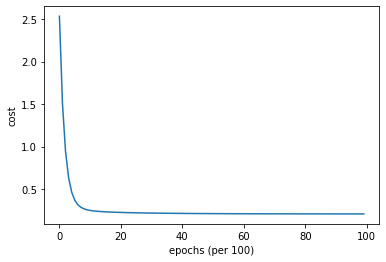

{'b0': 9.713091578545177, 'b1': 4.945735768492662, 'b2': 34.66269789306462}
Loss point for train:  2.6050736776098415
Loss point for test:  3.018722386421483


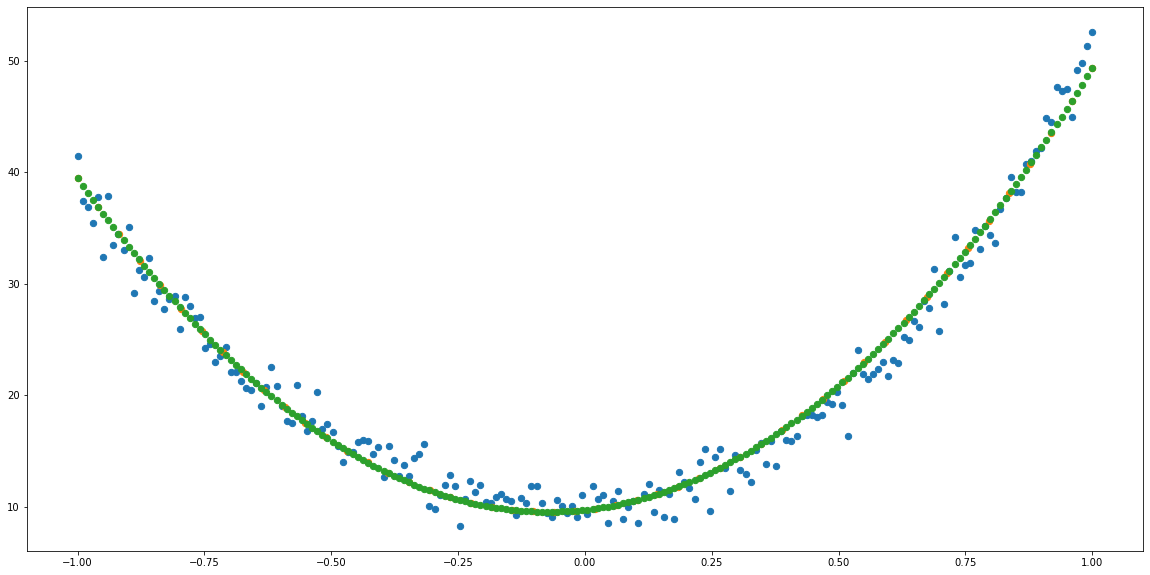

In [25]:
X_data_train, y_data_train = generate_samples(200)
X_data_test, y_data_test = generate_samples(50, seed=2)

params = model_polynomial_2(X_data_train, y_data_train, num_iterations=100, print_costs=True, activateRegularization=True, regularization_param=0.01)
print(params)

a_train = polynomial_2_model(params, X_data_train)
a_test = polynomial_2_model(params, X_data_test)

print("Loss point for train: ", mse_loss(a_train, y_data_train))
print("Loss point for test: ", mse_loss(a_test, y_data_test))

approximation_train = polynomial_2_model(params, X_data_train)
approximation_test = polynomial_2_model(params, X_data_test)

plt.figure(figsize=(20,10))
plt.scatter(X_data_train, y_data_train, s=40, cmap=plt.cm.Spectral)
plt.scatter(X_data_test, approximation_test, s=40, cmap=plt.cm.Spectral)
plt.scatter(X_data_train, approximation_train, s=40, cmap=plt.cm.Spectral)

## Conclusion of the 1st part
We have build the 2nd polynomial model and fit parameters using gradient descent with mini-batches. We can see that 20 iteration will be acceptable to fit parameters. 
The result is $$y=9.393879454569584 + 4.785027058927856 \cdot x + 34.87045016499367 \cdot x^2$$(Could be changed based on the iteration that was run)

The algorithm with regularization fit model better than algo without regularization, but the difference is not so big.
$L_2$:
<table>
    <thead>
       <td>Dataset</td>
       <td>$L_2$ score</td>
    </thead>
    <tr>
        <td>train</td>
        <td>2.609299252517077</td>
    </tr>
    <tr>
        <td>test</td>
        <td>3.0242857079856567</td>
    </tr>
    <tr>
        <td>train + regularization</td>
        <td>2.6050736776098415</td>
    </tr>
    <tr>
        <td>test + regularization</td>
        <td>3.018722386421483</td>
    </tr>
</table>


# Given Problem #2

In [26]:
california_housing = sklearn.datasets.fetch_california_housing(as_frame=True)

### Data exploration
Features of the housing

#### Usage of multivariative polynomial regression
This problem description is based on multiple regressor variables so that we will bild Multiple Polynomial Regression: $$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$$

In [27]:
X_data = california_housing.data
y_data = california_housing.target
m = X_data.shape[0]

X_data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


Targets to be predicted

In [28]:
y_data.head(10)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64

Description of how the data is distributed: draw diagram

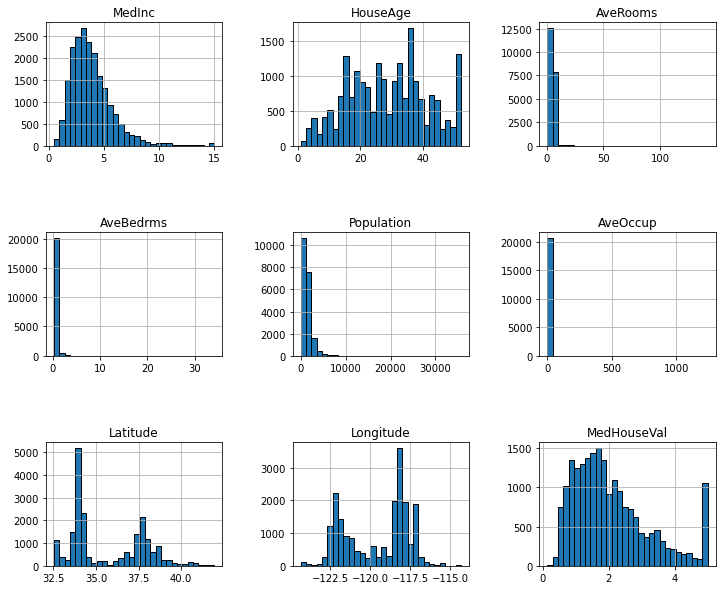

In [29]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

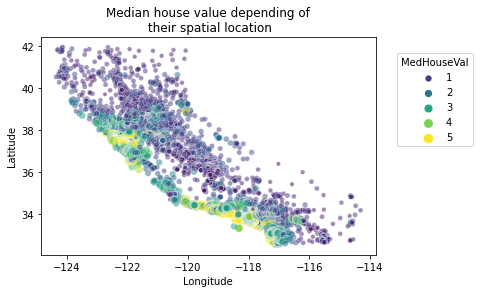

In [30]:
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

![image.png](/home/vegura/Downloads/California_map.jpg)

Los Angeles and San Francisco is the most expensive

In [31]:
X_data.shape[1]

8

In [32]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


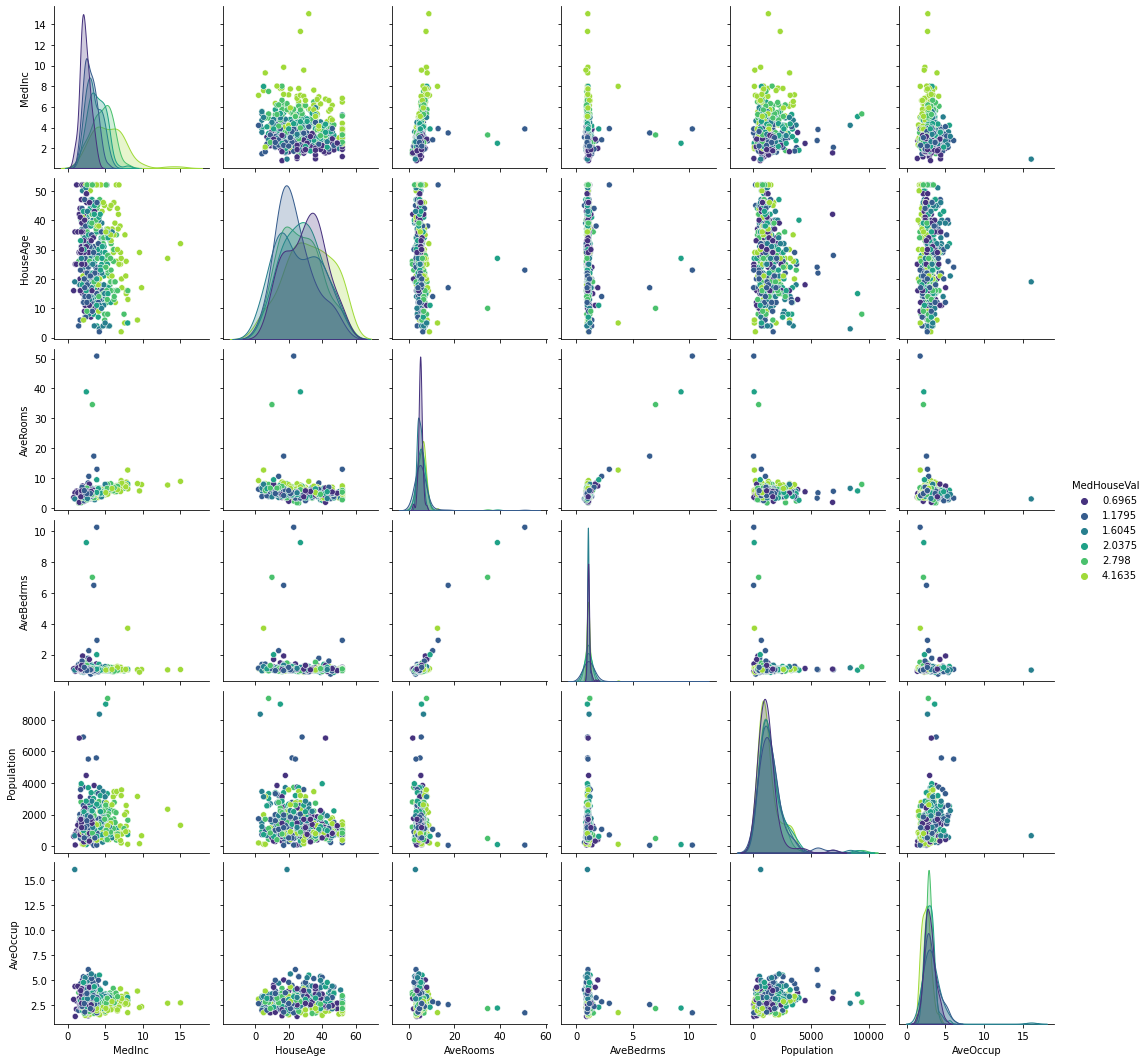

In [33]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")
X_data = subset 

In [34]:
def create_initial_params_with_dim(dim):
    return np.ones((1, dim))


def generate_powers(n, max_power=3):
    arange_features = np.arange(n)
    powers = []
    
    for power in range(0, max_power + 1):
        powers += itertools.combinations_with_replacement(arange_features, power)
    
    return powers

In [35]:
# Test creating initial parameters and generating powers
dim = 10
init_params = create_initial_params_with_dim(dim).shape
powers = generate_powers(3)
powers_dim2 = generate_powers(3, 2)

print("Generated init params: ", init_params)
print("Generated powers(Combination with repetition of the set of features): ", powers)
print("Generated powers with dim = 2: ", powers_dim2)

Generated init params:  (1, 10)
Generated powers(Combination with repetition of the set of features):  [(), (0,), (1,), (2,), (0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2), (0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 1), (0, 1, 2), (0, 2, 2), (1, 1, 1), (1, 1, 2), (1, 2, 2), (2, 2, 2)]
Generated powers with dim = 2:  [(), (0,), (1,), (2,), (0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)]


In [248]:
def multinomial_argument_model(X, dim=3):
    ''' X must have dimension (m, n)
        making vector that has structure:
            [
                1
                x1
                x2
                x3
                x1 * x2
                x1 * x3
                x2 * x3
                ....
            ]
    '''
    multiplication_arg_list = generate_powers(X.shape[1], max_power=dim)
    argument_model_values = []
    
    for m in range(X.shape[0]):
        example_args = []
        
        for arguments in multiplication_arg_list:
            argument_value = 1
            for i in arguments:
                argument_value = argument_value * X[m][i]
            
            example_args.append(argument_value)

#         print(f"args: {argument_model_values} + {example_args.shape}")
#         example_args = example_args.reshape(example_args.shape[0], 1)
#         argument_model_values = np.vstack([argument_model_values, example_args])
        argument_model_values.append(np.array(example_args))
    
    return np.array(argument_model_values)

In [249]:
a1 = np.array([])
a1 = np.hstack([a1, 2])
a1 = np.hstack([a1, 3])
a1.reshape(a1.shape[0], )

array([2., 3.])

In [250]:
# Test counting argument model
X = np.array([2, 3, 4]).reshape(1, 3)

# P a t t e r n
print("Pattern of multiplication: ", generate_powers(X.shape[1], max_power=2))


# C o m p u t a t i o n s
#
# Vector must with dim =2 must be
# [1, 2, 3, 4, 2 * 2, 2 * 3, 2 * 4, 3 * 3, 3 * 4, 4 * 4]
print("result is: ", multinomial_argument_model(X, dim=2))

Pattern of multiplication:  [(), (0,), (1,), (2,), (0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)]
result is:  [[ 1  2  3  4  4  6  8  9 12 16]]


In [252]:
X_test = np.arange(3)
X_test = np.vstack([[X_test, X_test]]).T
Y_test = np.arange(3).reshape(3, 1)

print(X_test.shape)

print("Pattern of multiplication: ", generate_powers(X_test.shape[1], max_power=2))
print("result is: ", multinomial_argument_model(X_test, dim=2).shape)

(3, 2)
Pattern of multiplication:  [(), (0,), (1,), (0, 0), (0, 1), (1, 1)]
result is:  (3, 6)


Розглянемо випадок розмірності 2 та вектор з 3 ознаками(features)
$y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_{11}x_1^2 + b_{12}x_1x_2 + b_{13}x_1x_3 + b_{22}x_2^2 + b_{23}x_2x_3 + b_{33}x_3^2$

Градієнтний спуск буде відбуватися відносно кожного параметру
$$\frac{\partial y}{\partial \beta_0} = 1$$
$$\frac{\partial y}{\partial \beta_1} = x_1$$
$$\frac{\partial y}{\partial \beta_2} = x_2$$
$$\frac{\partial y}{\partial \beta_3} = x_3$$
$$\frac{\partial y}{\partial \beta_{11}} = x_1^2$$
$$...$$

тобто

$$
\frac{\partial y}{\partial \beta} = \left ( \begin{matrix}
1\\ 
x_1\\ 
x_2\\ 
x_3\\ 
x_1^2\\ 
...
\end{matrix} \right ) = arg(y)
$$

Функція помилки 
$$
J = MSE = \frac1n \cdot \sum_{i=1}^n (y_{true}- y_{predicted})^2 = \sum_{i=1}^n (y_{true}- \beta X)^2
$$


Функція втрат з регуляризацією

$$
J_{reg} = J + \frac{\lambda}{2n} \sum_l \left \| \beta^{[l]} \right \|^2_F \\
\left \| \beta^{[l]} \right \|^2 = \sum^{m}_{i=1} (\beta_{i})^2
$$

Оновлення параметрів за градієнтним спуском виглядає наступним чином:
$$
\beta = \beta - \alpha \cdot \frac{\partial J_{reg}(\beta, X)}{\partial \beta}
$$

In [405]:
def gradient_descent_multinomial(Y_true, Y_predicted, _args, beta, lambd, reg=False):
    m = Y_true.shape[0]
    grad = 2 / m * np.sum((Y_predicted - Y_true) * _args, axis=0)
    if reg:
        grad = grad + lambd / 2 / m * np.sum(np.power(beta, 2))
    return grad

In [406]:
def update_params(grads, beta, alpha):
    beta = beta - alpha * grads
    return beta

In [407]:
# multinomial version
def mse_loss_regularization(y_pred, y_true, beta, lambd):
    m = y_pred.shape[0]
    
    mse_loss_result = np.sum(mse_loss(y_pred, y_true))
    beta_sq = np.sum(beta * beta)
    regularization_score_L2 = (lambd/2/m) * np.sum(beta * beta)
    loss_with_regularization = mse_loss_result + regularization_score_L2

    return loss_with_regularization

In [470]:
def california_houses_model(X, y, num_iterations=20, reg_coef=0.05, learning_coef=0.005, reg=False):
    lambd = reg_coef
    alpha = learning_coef
    seed = 1
    (m, n) = X.shape[0], X.shape[1]
    y = y.reshape(m, 1)
    mini_batch_size = 1024
    
    print(f"Given set: {X.shape} {y.shape} \n\tm = {m}, n = {n}")
    arg_combinations = generate_powers(n)
    beta = create_initial_params_with_dim(len(arg_combinations))
    print("Beta shape is: ", beta.shape)
    
    costs = []
    
    for i in range(num_iterations):
        # Y shape: (m, 1)
        # X shape: (m, n)
        minibatches = random_mini_batches(X, y, mini_batch_size=mini_batch_size, seed=seed)
        iteration_cost = 0
        
        for minibatch in minibatches:
            (mini_X, mini_Y) = minibatch
            _args = multinomial_argument_model(mini_X, dim=3)
            
            Y_pred = np.sum(_args * beta, axis=1)
            Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
            
            cost = mse_loss(Y_pred, mini_Y)
            grads = gradient_descent_multinomial(mini_Y, Y_pred, _args, beta, lambd, reg=reg)
            beta = beta - alpha * grads
            
            iteration_cost += cost
        
        print(f"Iteration {i}, cost = {iteration_cost / mini_batch_size}")
        costs.append(iteration_cost / mini_batch_size)
        
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.show()
    return beta

In [471]:
X_data = preprocessing.normalize(X_data, axis=0)
y_data = y_data.values.reshape(-1, 1)
y_data = preprocessing.normalize(y_data)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Навчимо модель на 20 епохах без регуляризації

Given set: (19616, 8) (19616, 1) 
	m = 19616, n = 8
Beta shape is:  (1, 165)
Iteration 0, cost = 2.43916977326877e-05
Iteration 1, cost = 1.834353160916192e-05
Iteration 2, cost = 1.4297776475188843e-05
Iteration 3, cost = 1.1591443546561536e-05
Iteration 4, cost = 9.781059910657319e-06
Iteration 5, cost = 8.569986102611298e-06
Iteration 6, cost = 7.759799183698169e-06
Iteration 7, cost = 7.2177730969938665e-06
Iteration 8, cost = 6.8551264038400085e-06
Iteration 9, cost = 6.612472265571369e-06
Iteration 10, cost = 6.450085972326067e-06
Iteration 11, cost = 6.341394907903803e-06
Iteration 12, cost = 6.268623989605375e-06
Iteration 13, cost = 6.219882898312503e-06
Iteration 14, cost = 6.187217718522527e-06
Iteration 15, cost = 6.165307670759625e-06
Iteration 16, cost = 6.150593346066849e-06
Iteration 17, cost = 6.1406935727171365e-06
Iteration 18, cost = 6.134015349839999e-06
Iteration 19, cost = 6.129492924472561e-06


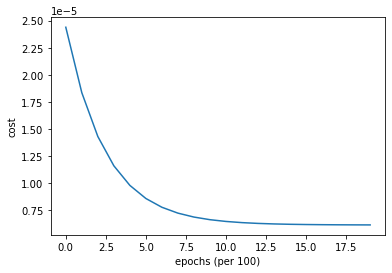

array([[0.96708212, 0.99974696, 0.99978056, 0.99972003, 0.99973145,
        0.99975032, 0.9995228 , 0.99977066, 1.00022926, 0.99999755,
        0.99999834, 0.99999786, 0.99999809, 0.99999809, 0.99999343,
        0.99999824, 1.00000176, 0.99999825, 0.99999825, 0.99999829,
        0.99999859, 0.99999553, 0.99999847, 1.00000153, 0.99999242,
        0.99999213, 0.99999834, 0.99999757, 0.99999802, 1.00000195,
        0.99999149, 0.99999842, 0.99999729, 0.9999981 , 1.00000187,
        0.99999572, 0.99998844, 0.99999827, 1.00000174, 0.99970987,
        0.99999647, 1.00000337, 0.9999984 , 1.0000016 , 0.9999984 ,
        0.99999997, 0.99999998, 0.99999998, 0.99999998, 0.99999998,
        0.9999999 , 0.99999998, 1.00000002, 0.99999999, 0.99999999,
        0.99999999, 0.99999999, 0.99999994, 0.99999999, 1.00000001,
        0.99999995, 0.99999995, 0.99999999, 0.99999997, 0.99999998,
        1.00000001, 0.99999995, 0.99999999, 0.99999997, 0.99999999,
        1.00000001, 0.99999997, 0.99999983, 0.99

In [472]:
beta_sol = california_houses_model(X_data[:-1024], y_data[:-1024])
beta_sol

In [473]:
# Test
X_test = X_data[-1024:]
y_test = y_data[-1024:]

_args = multinomial_argument_model(X_test, dim=3)

Y_test_pred = np.sum(_args * beta_sol, axis=1)
Y_test_pred = Y_test_pred.reshape(-1, 1)
            
cost = mse_loss(Y_test_pred, y_test)
cost

4.7596695745858884e-05

Given set: (19616, 8) (19616, 1) 
	m = 19616, n = 8
Beta shape is:  (1, 165)
Iteration 0, cost = 2.4174714124479985e-05
Iteration 1, cost = 1.772894103556736e-05
Iteration 2, cost = 1.3507930268180911e-05
Iteration 3, cost = 1.0758075520645285e-05
Iteration 4, cost = 8.978404066811124e-06
Iteration 5, cost = 7.836358029081757e-06
Iteration 6, cost = 7.111565711994089e-06
Iteration 7, cost = 6.6583160211967605e-06
Iteration 8, cost = 6.38052754301867e-06
Iteration 9, cost = 6.2150624131370075e-06
Iteration 10, cost = 6.120611514615869e-06
Iteration 11, cost = 6.070297779791091e-06
Iteration 12, cost = 6.046759552972555e-06
Iteration 13, cost = 6.0388871729478065e-06
Iteration 14, cost = 6.039660748984091e-06
Iteration 15, cost = 6.044720733894094e-06
Iteration 16, cost = 6.051425570167127e-06
Iteration 17, cost = 6.0582326124547e-06
Iteration 18, cost = 6.064293226329208e-06
Iteration 19, cost = 6.069189464599088e-06


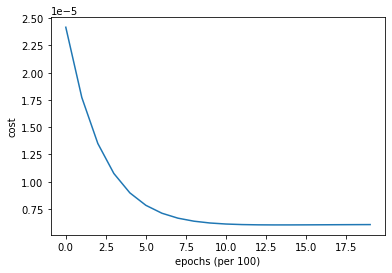

In [475]:
beta_sol_reg = california_houses_model(X_data[:-1024], y_data[:-1024], reg=True)

In [476]:
# Test
X_test = X_data[-1024:]
y_test = y_data[-1024:]

_args = multinomial_argument_model(X_test, dim=3)

Y_test_pred = np.sum(_args * beta_sol_reg, axis=1)
Y_test_pred = Y_test_pred.reshape(-1, 1)
            
cost = mse_loss(Y_test_pred, y_test)
cost

5.784353003405965e-05

We can see that injecting regularization into our model will occur more quicklier gradient descent. But cost function is bigger than without regularization. 

Given set: (19616, 8) (19616, 1) 
	m = 19616, n = 8
Beta shape is:  (1, 165)
Iteration 0, cost = 7.297014791364033e-06
Iteration 1, cost = 6.1498367820434644e-06
Iteration 2, cost = 6.134390152209324e-06
Iteration 3, cost = 6.118989099226951e-06
Iteration 4, cost = 6.1036334845889626e-06
Iteration 5, cost = 6.088323170211278e-06
Iteration 6, cost = 6.0730580184318075e-06
Iteration 7, cost = 6.057837892009183e-06
Iteration 8, cost = 6.042662654121466e-06
Iteration 9, cost = 6.027532168364848e-06
Iteration 10, cost = 6.012446298752392e-06
Iteration 11, cost = 5.997404909712738e-06
Iteration 12, cost = 5.982407866088849e-06
Iteration 13, cost = 5.967455033136745e-06
Iteration 14, cost = 5.952546276524205e-06
Iteration 15, cost = 5.937681462329556e-06
Iteration 16, cost = 5.922860457040377e-06
Iteration 17, cost = 5.908083127552275e-06
Iteration 18, cost = 5.893349341167613e-06
Iteration 19, cost = 5.878658965594289e-06


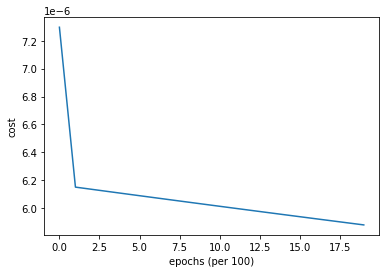

4.8505909593121266e-05
Given set: (19616, 8) (19616, 1) 
	m = 19616, n = 8
Beta shape is:  (1, 165)
Iteration 0, cost = 9.182724769165771e-06
Iteration 1, cost = 6.127037628012614e-06
Iteration 2, cost = 6.123037313666911e-06
Iteration 3, cost = 6.11993711656074e-06
Iteration 4, cost = 6.116844555501843e-06
Iteration 5, cost = 6.113753889198673e-06
Iteration 6, cost = 6.110665051030706e-06
Iteration 7, cost = 6.107578039131623e-06
Iteration 8, cost = 6.1044928523814914e-06
Iteration 9, cost = 6.101409489669641e-06
Iteration 10, cost = 6.098327949886175e-06
Iteration 11, cost = 6.095248231921873e-06
Iteration 12, cost = 6.092170334668203e-06
Iteration 13, cost = 6.0890942570173046e-06
Iteration 14, cost = 6.086019997861999e-06
Iteration 15, cost = 6.082947556095783e-06
Iteration 16, cost = 6.079876930612831e-06
Iteration 17, cost = 6.076808120307989e-06
Iteration 18, cost = 6.073741124076789e-06
Iteration 19, cost = 6.070675940815433e-06


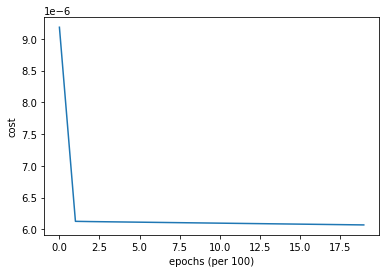

4.8281142025590664e-05
Given set: (19616, 8) (19616, 1) 
	m = 19616, n = 8
Beta shape is:  (1, 165)
Iteration 0, cost = 1.1822154864203084e-05
Iteration 1, cost = 6.211696552381764e-06
Iteration 2, cost = 6.124763444685242e-06
Iteration 3, cost = 6.121640439562025e-06
Iteration 4, cost = 6.120031259374853e-06
Iteration 5, cost = 6.118478442898112e-06
Iteration 6, cost = 6.116930988615036e-06
Iteration 7, cost = 6.115384559883123e-06
Iteration 8, cost = 6.113838657015292e-06
Iteration 9, cost = 6.11229321956607e-06
Iteration 10, cost = 6.110748240073083e-06
Iteration 11, cost = 6.109203717507367e-06
Iteration 12, cost = 6.107659651621769e-06
Iteration 13, cost = 6.106116042264192e-06
Iteration 14, cost = 6.1045728892941375e-06
Iteration 15, cost = 6.103030192572539e-06
Iteration 16, cost = 6.1014879519605565e-06
Iteration 17, cost = 6.099946167319408e-06
Iteration 18, cost = 6.098404838510351e-06
Iteration 19, cost = 6.096863965394695e-06


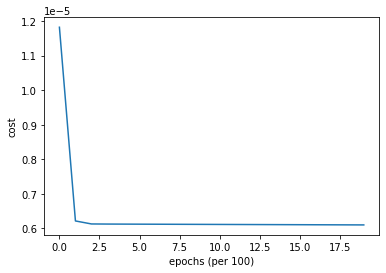

4.87371412813666e-05
Given set: (19616, 8) (19616, 1) 
	m = 19616, n = 8
Beta shape is:  (1, 165)
Iteration 0, cost = 2.149550541416802e-05
Iteration 1, cost = 1.297498115123111e-05
Iteration 2, cost = 9.177472947245788e-06
Iteration 3, cost = 7.484727139883753e-06
Iteration 4, cost = 6.729993455576458e-06
Iteration 5, cost = 6.39332722614488e-06
Iteration 6, cost = 6.243012539491967e-06
Iteration 7, cost = 6.175777104906599e-06
Iteration 8, cost = 6.145589380201143e-06
Iteration 9, cost = 6.13192863743575e-06
Iteration 10, cost = 6.125644729617849e-06
Iteration 11, cost = 6.1226562479354954e-06
Iteration 12, cost = 6.121141766652519e-06
Iteration 13, cost = 6.120287817881027e-06
Iteration 14, cost = 6.1197306894796255e-06
Iteration 15, cost = 6.1193074886856444e-06
Iteration 16, cost = 6.118945080892723e-06
Iteration 17, cost = 6.118610510238449e-06
Iteration 18, cost = 6.118288846451688e-06
Iteration 19, cost = 6.117973272917462e-06


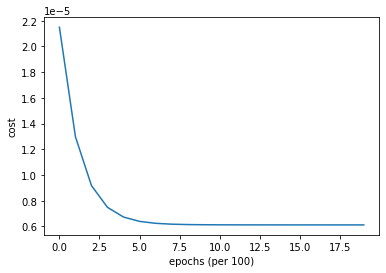

4.894203692228109e-05
Given set: (19616, 8) (19616, 1) 
	m = 19616, n = 8
Beta shape is:  (1, 165)
Iteration 0, cost = 2.7273959226579322e-05
Iteration 1, cost = 2.56458089418909e-05
Iteration 2, cost = 2.414298832677032e-05
Iteration 3, cost = 2.2755849675127452e-05
Iteration 4, cost = 2.1475487950238276e-05
Iteration 5, cost = 2.0293683614822e-05
Iteration 6, cost = 1.92028498620045e-05
Iteration 7, cost = 1.8195983908388775e-05
Iteration 8, cost = 1.726662203653757e-05
Iteration 9, cost = 1.6408798098243058e-05
Iteration 10, cost = 1.5617005212173063e-05
Iteration 11, cost = 1.4886160409994665e-05
Iteration 12, cost = 1.42115720040042e-05
Iteration 13, cost = 1.3588909466766265e-05
Iteration 14, cost = 1.3014175629386107e-05
Iteration 15, cost = 1.2483681019932296e-05
Iteration 16, cost = 1.1994020177262128e-05
Iteration 17, cost = 1.1542049788184181e-05
Iteration 18, cost = 1.1124868507601097e-05
Iteration 19, cost = 1.0739798332076038e-05


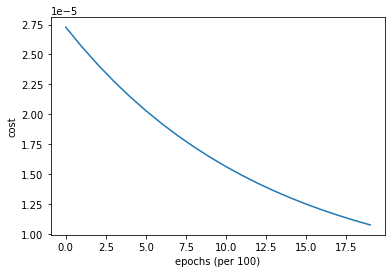

0.0002314839478403165


In [480]:
alphas = [0.5, 0.1, 0.05, 0.01, 0.001]
for alpha in alphas:
    print("================================= ")
    beta_sol = california_houses_model(X_data[:-1024], y_data[:-1024], num_iterations=20, reg_coef=0.05, learning_coef=alpha, reg=False)
    X_test = X_data[-1024:]
    y_test = y_data[-1024:]

    _args = multinomial_argument_model(X_test, dim=3)

    Y_test_pred = np.sum(_args * beta_sol, axis=1)
    Y_test_pred = Y_test_pred.reshape(-1, 1)

    print(mse_loss(Y_test_pred, y_test))

In [482]:
np.array([[1,2,3,4,5], [6,7,8,9,0]])[:, :]

array([[2, 3, 4, 5],
       [7, 8, 9, 0]])